In [1]:
import numpy as np
import librosa
import csv
import matplotlib.pyplot as plt
from scipy.signal import medfilt
import scipy.signal as signal
from scipy.fftpack import dct
x, s1=librosa.load('C:/Users/Lenovo/Downloads/Healthy.wav')  
y, s2=librosa.load('C:/Users/Lenovo/Downloads/Unhealthy.wav')
desired_length = 2048 + 512 * 509
if len(x) < desired_length:
    import numpy as np
    x = np.pad(x, (0, desired_length - len(x)))

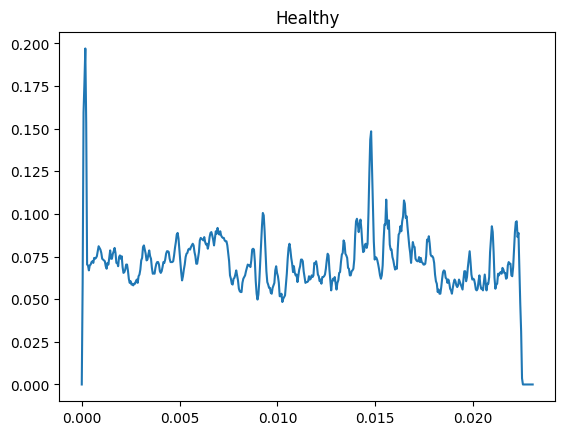

In [2]:
window_size=2048
hop_size=512
zcr1=[np.sum(np.abs(np.diff(np.sign(x[i:i+window_size]))))/(2*window_size) for i in range(0,len(x)-window_size,hop_size)]
t=np.arange(len(zcr1))/s1
plt.plot(t, zcr1)
plt.title("Healthy")
plt.show()

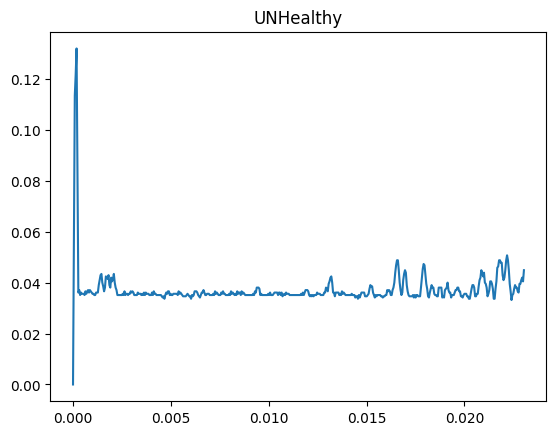

In [3]:
zcr2=[np.sum(np.abs(np.diff(np.sign(y[i:i+window_size]))))/(2*window_size) for i in range(0,len(y)-window_size,hop_size)]
t=np.arange(len(zcr2))/s2
plt.plot(t, zcr2)
plt.title("UNHealthy")
plt.show()

In [4]:
zcr1

[0.0,
 0.059814453125,
 0.159423828125,
 0.177001953125,
 0.197021484375,
 0.1533203125,
 0.0703125,
 0.06982421875,
 0.06689453125,
 0.06982421875,
 0.0703125,
 0.07177734375,
 0.072265625,
 0.0712890625,
 0.07421875,
 0.07373046875,
 0.07421875,
 0.0751953125,
 0.078125,
 0.0810546875,
 0.080078125,
 0.0791015625,
 0.0771484375,
 0.07373046875,
 0.0732421875,
 0.07275390625,
 0.072265625,
 0.0693359375,
 0.06787109375,
 0.0712890625,
 0.0703125,
 0.07470703125,
 0.07861328125,
 0.07373046875,
 0.07373046875,
 0.07666015625,
 0.078125,
 0.080078125,
 0.0771484375,
 0.0712890625,
 0.0712890625,
 0.0693359375,
 0.07470703125,
 0.07568359375,
 0.07373046875,
 0.0751953125,
 0.06884765625,
 0.0654296875,
 0.06591796875,
 0.0673828125,
 0.0703125,
 0.0703125,
 0.06689453125,
 0.06201171875,
 0.0595703125,
 0.060546875,
 0.05859375,
 0.05908203125,
 0.05810546875,
 0.05908203125,
 0.05908203125,
 0.060546875,
 0.0615234375,
 0.0595703125,
 0.0634765625,
 0.064453125,
 0.0673828125,
 0.07275

(509,)

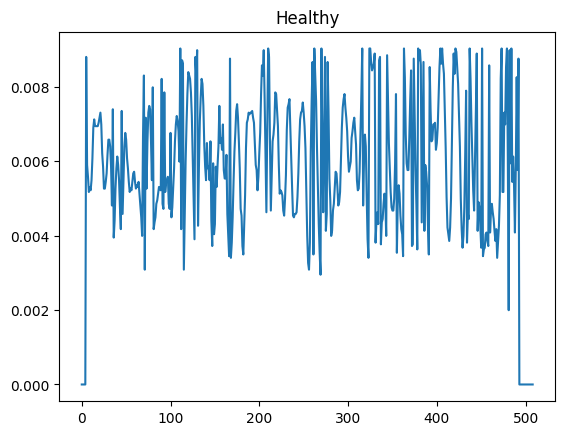

In [5]:
def jitterr(x, sr):
    periods = []
    for i in range(0, len(x) - 2048, 512):
        frame = x[i:i+2048]
        corr = np.correlate(frame, frame, mode='full')
        corr[:40] = 0
        peak = np.argmax(corr[:200])
        periods.append(peak / sr)
    return np.array(periods)
p1 = jitterr(x, s1)
jitter = np.mean(np.abs(np.diff(p1)))
plt.plot(p1)
plt.title('Healthy')
p1.shape

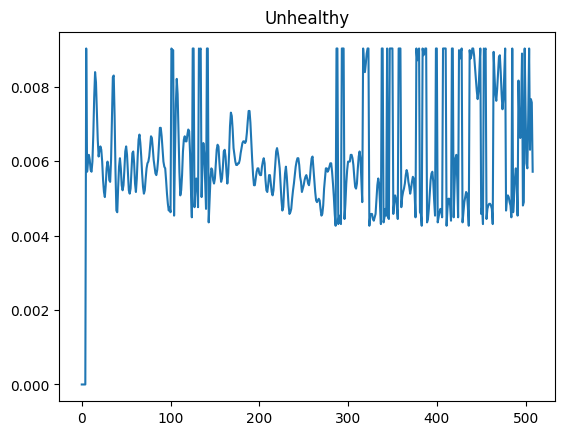

(509,)

In [6]:
p2=jitterr(y, s2)
jitter=np.mean(np.abs(np.diff(p2)))
plt.plot(p2)
plt.title('Unhealthy')
plt.show()
p2.shape

(509,)

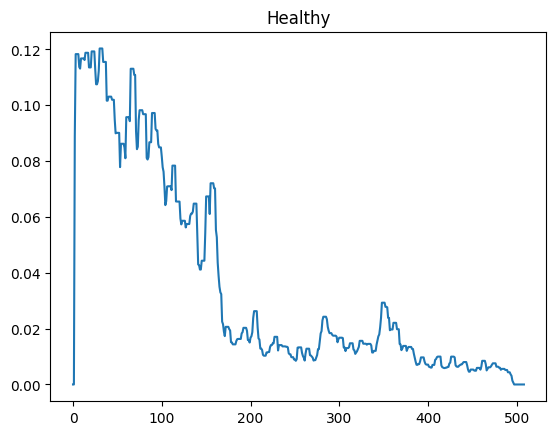

In [7]:
amps = []
def shimmerr(x):
    amps.clear()
    for i in range(0, len(x)-2048,512):
        frame = x[i:i+2048]
        amps.append(np.max(np.abs(frame)))
    return np.array(amps)
a=shimmerr(x)
shimmer=np.mean(np.abs(np.diff(a)))
plt.plot(a)
plt.title('Healthy')
a.shape

(509,)

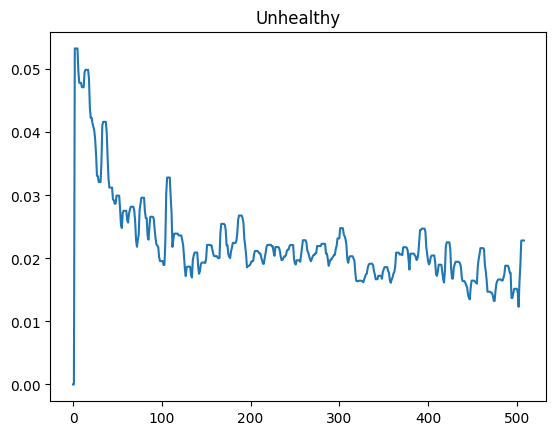

In [8]:
a2=shimmerr(y)
shimmer=np.mean(np.abs(np.diff(a2)))
plt.plot(a2)
plt.title('Unhealthy')
a2.shape

In [9]:
def hnr(x):
    hnr=[]
    for i in range(0,len(x)-2048,512):
        f=x[i:i+2048]
        r=np.correlate(f,f,'full')[len(f):]
        peak=np.argmax(r[1:200])+1
        hnr.append(10*np.log10((r[peak]+1e-6)/((r[0]-r[peak])+1e-6)))
    return np.array(hnr)

(509,)

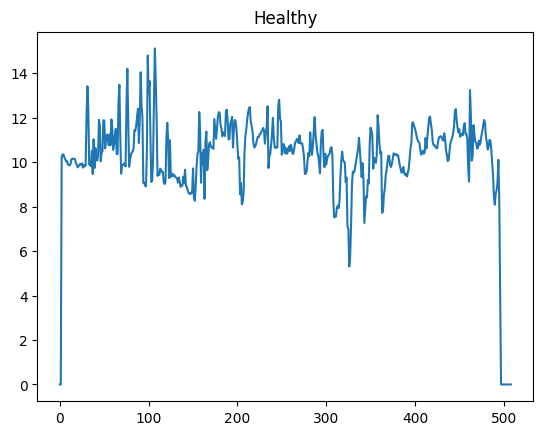

In [10]:
h1=hnr(x)
plt.plot(h1)
plt.title('Healthy')
h1.shape

(509,)

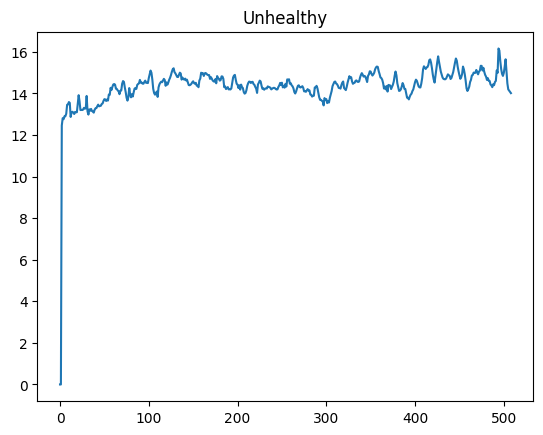

In [11]:
h2=hnr(y)
plt.plot(h2)
plt.title('Unhealthy')
h2.shape

In [12]:
def snr(x):
    snr=[]
    for i in range(0,len(x)-2048,512):
        f=x[i:i+2048]
        s=np.mean(f**2)
        n=np.mean((f-medfilt(f,11))**2)
        snr.append(10*np.log10((s+1e-6)/(n+1e-6)))
    return np.array(snr)
snr

<function __main__.snr(x)>

(509,)

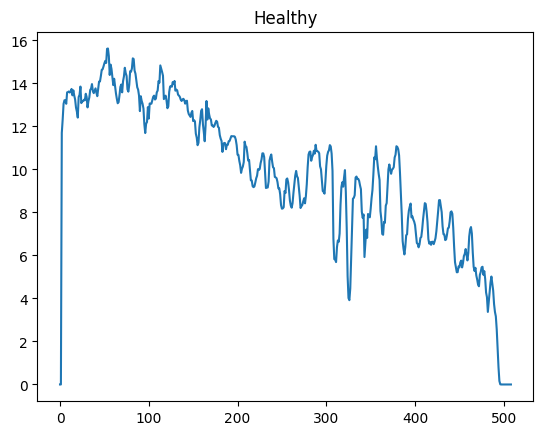

In [13]:
sn1=snr(x)
plt.plot(sn1)
plt.title('Healthy')
sn1.shape

(509,)

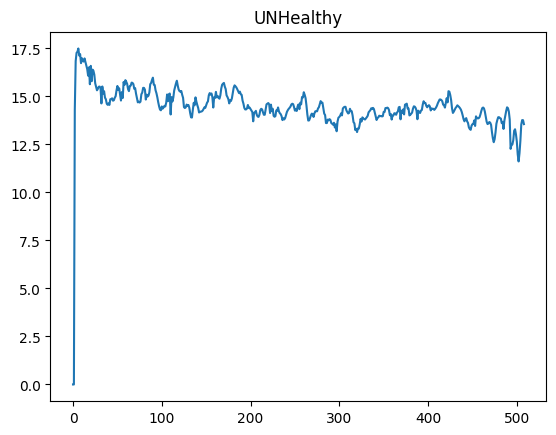

In [14]:
sn2=snr(y)
plt.plot(sn2)
plt.title('UNHealthy')
sn2.shape

In [15]:
zcr_healthy=zcr1
zcr_unhealthy=zcr2
jitter_healthy=p1
jitter_unhealthy=p2
shimmer_healthy=a
shimmer_unhealthy=a2
hnr_healthy=h1
hnr_unhealthy=h2
snr_healthy=sn1
snr_unhealthy=sn2

In [16]:
min_len =509
zcr_healthy=zcr_healthy[:509]
zcr_unhealthy=zcr_unhealthy[:509]
jitter_healthy=jitter_healthy[:509]
jitter_unhealthy=jitter_unhealthy[:min_len]
shimmer_healthy=shimmer_healthy[:min_len]
shimmer_unhealthy=shimmer_unhealthy[:min_len]
hnr_healthy=hnr_healthy[:min_len]
hnr_unhealthy=hnr_unhealthy[:min_len]
snr_healthy=snr_healthy[:min_len]
snr_unhealthy=snr_unhealthy[:min_len]

min_len

509

In [17]:
# data = np.column_stack((zcr_healthy,zcr_unhealthy, jitter_healthy,jitter_unhealthy, shimmer_healthy,shimmer_unhealthy, hnr_healthy,hnr_unhealthy,snr_healthy,snr_unhealthy))
# np.savetxt('voice_features.csv', data, delimiter=',',
#            header='zcr_healthy,zcr_unhealthy, jitter_healthy,jitter_unhealthy, shimmer_healthy,shimmer_unhealthy, hnr_healthy,hnr_unhealthy,snr_healthy,snr_unhealthy', comments='')


In [18]:
x, s1=librosa.load('C:/Users/Lenovo/Downloads/Healthy.wav')  
y, s2=librosa.load('C:/Users/Lenovo/Downloads/Unhealthy.wav')

In [19]:
fl=int(s1*0.25)
hl=int(s1*0.1)
frames=np.array([x[i:i+fl]*np.hamming(fl) for i in range(0,len(x)-fl,hl)])
ps=np.abs(np.fft.rfft(frames,512))**2
def erb(f): return 24.7*(4.37e-3*f+1)
n=26
low=100
high=s1/2
erb_points = np.linspace(erb(low),erb(high),n)
cf=(erb_points/24.7-1)/4.37e-3
freqs=np.linspace(0,s1/2,257)
filters=np.array([np.maximum(1-np.abs(freqs-c)/(1.019*erb(c)/2),0) for c in cf])
filt=ps@filters.T

In [20]:
s1

22050

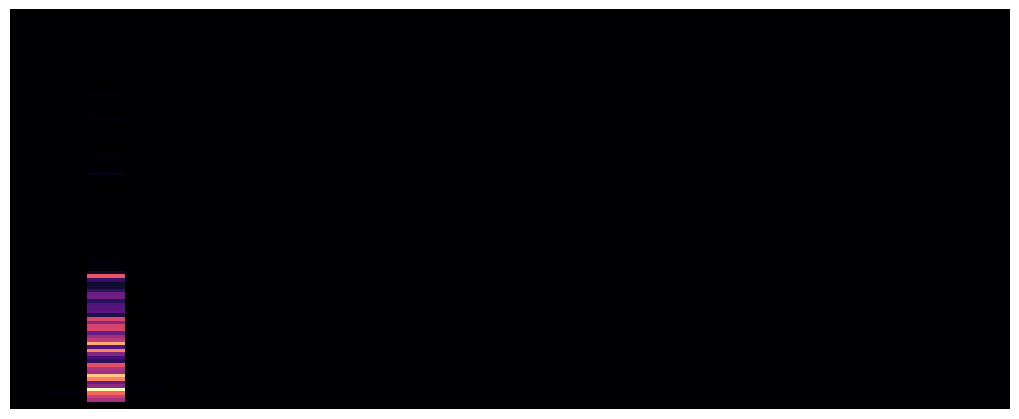

In [21]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_axes([0, 0, 1, 1])  
ax.imshow(filt, origin='lower', aspect='auto', cmap='magma')
ax.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
fig.patch.set_visible(False)
plt.margins(0, 0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.savefig('C:/Users/Lenovo/gfcc_Healthy.png')
plt.show()

In [22]:
log_e = np.log(filt+1e-10)
gfcc = dct(log_e,norm='ortho',axis=1)[:,:13]

In [23]:
fl=int(s2*0.25)
hl=int(s2*0.1)
frames=np.array([y[i:i+fl]*np.hamming(fl) for i in range(0,len(y)-fl,hl)])
ps=np.abs(np.fft.rfft(frames,512))**2
def erb(f): return 24.7*(4.37e-3*f+1)
n=26
low=100
high=s2/2
erb_points=np.linspace(erb(low),erb(high),n)
cf=(erb_points/24.7-1)/4.37e-3
freqs=np.linspace(0,s2/2,257)
filters=np.array([np.maximum(1-np.abs(freqs-c)/(1.019*erb(c)/2),0) for c in cf])
filt=ps@filters.T

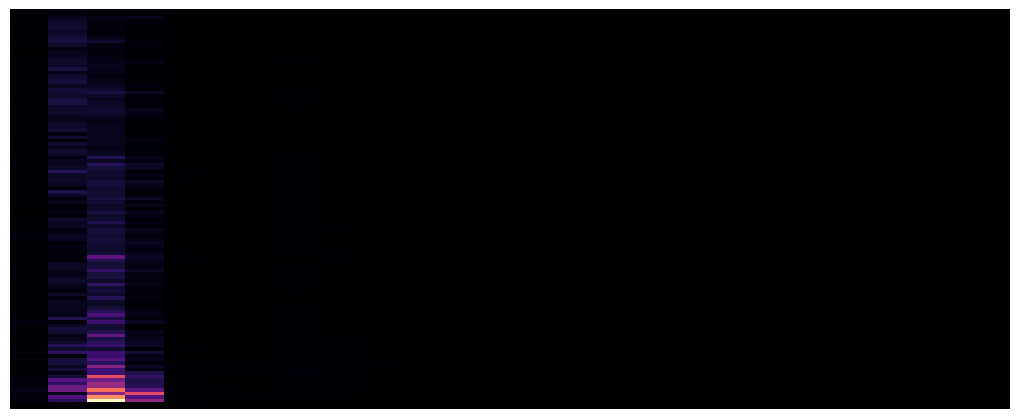

In [24]:
fig=plt.figure(figsize=(10, 4))
ax=fig.add_axes([0, 0, 1, 1]) 
ax.imshow(filt, origin='lower', aspect='auto', cmap='magma')
ax.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
fig.patch.set_visible(False)
plt.margins(0, 0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.savefig('C:/Users/Lenovo/gfcc_Unhealthy.png')
plt.show()

In [25]:
log_e = np.log(filt+1e-10)
gfcc = dct(log_e,norm='ortho',axis=1)

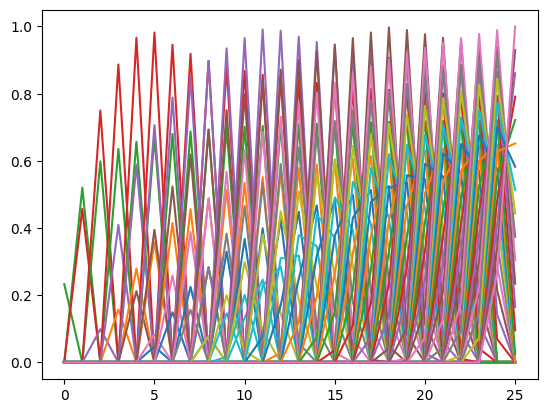

In [26]:
plt.plot(filters)

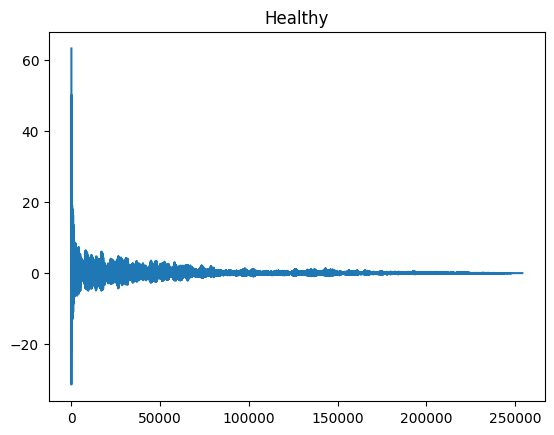

In [27]:
f=200
t=np.linspace(0,0.05,int(s1*0.05))
autocorr=np.correlate(x,x,mode='full')
autocorr=autocorr[len(autocorr)//2:]
peak=np.argmax(autocorr[1:])+1
f0=s1/peak
plt.plot(autocorr)
plt.title('Healthy')
plt.show()

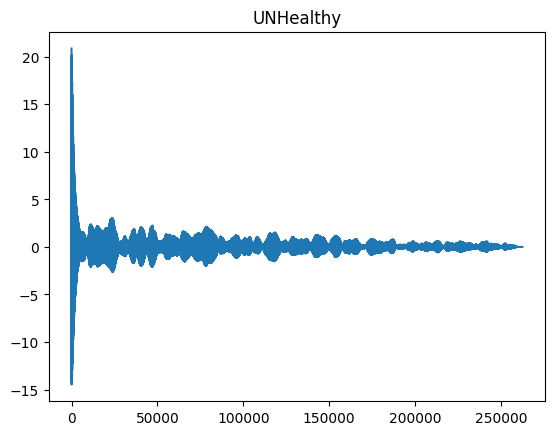

In [28]:
t=np.linspace(0,0.05,int(s2*0.05))
autocorr=np.correlate(y,y,mode='full')
autocorr=autocorr[len(autocorr)//2:]
peak=np.argmax(autocorr[1:])+1
f0=s2/peak
plt.plot(autocorr)
plt.title('UNHealthy')
plt.show()